# Problema del commesso viaggatore (TSP)

## Definizione
### Dato un grafo $G(V,A)$ a cui è associato un costo $d_{ij}$ ad ogni arco $(i,j) \in A$. Il problema del commesso viaggiatore consiste nel cercare il circuito Hamiltoniano di costo minimo.
### - Un ciclo Hamiltoniano è un ciclo che attraversa tutti i nodi del grafo una ed una sola volta.
### - Il costo di un ciclo Hamiltoniano è dato dalla somma dei costi degli archi che lo compongono.

## Definizione

## Variabili di decisione

### <span style="color:purple">$x_{ij} \quad (i,j) \in A $ </span>  - variabile binaria uguale a $1$ se l'arco $(i,j)$ appartiene al circuito hamiltoniano, 0 altrimenti.


## Funzione obiettivo
### Minimizza il costo totale del circuito hamiltoniano

\begin{equation}
\text{Min} \quad Z = \sum_{(i,j) \in A} d_{ij} \cdot x_{ij}
\end{equation}

## Vincoli di assegnamento
### In una soluzione ammissibile (circuito hamiltoniano) ogni nodo deve avere esattamente un arco entrante ed esattamente un arco uscente.

\begin{equation}
\sum_{i \in V, \ i \neq j} x_{ij} = 1 \quad \quad j \in V 
\end{equation}

\begin{equation}
\sum_{i \in V, \ i \neq j} x_{ji} = 1 \quad \quad j \in V 
\end{equation}

## Vincoli di assenza di sottogiri 

\begin{eqnarray}
& \sum_{i,j \in S} x_{ij} \leq |S| -1 \quad S \subset V
\end{eqnarray}

## Istanza

### Legge il file in input e crea il dizionario *Nodes* con chiave *nome del nodo* e valore *coordinate del nodo*

In [6]:
Nodes = {}

file = open("att48.tsp", "r")

line = file.readline()

while not line.startswith("EOF"):
    
    if line.startswith("DIMENSION"):
        NumNodes = int(line.split()[1])
    elif line.startswith("NODE"):
        for i in range(NumNodes) :
            line = file.readline().split()
            Nodes[int(line[0])] = (float(line[1]), float(line[2]))
    
    line = file.readline()

print(Nodes)

{1: (6734.0, 1453.0), 2: (2233.0, 10.0), 3: (5530.0, 1424.0), 4: (401.0, 841.0), 5: (3082.0, 1644.0), 6: (7608.0, 4458.0), 7: (7573.0, 3716.0), 8: (7265.0, 1268.0), 9: (6898.0, 1885.0), 10: (1112.0, 2049.0), 11: (5468.0, 2606.0), 12: (5989.0, 2873.0), 13: (4706.0, 2674.0), 14: (4612.0, 2035.0), 15: (6347.0, 2683.0), 16: (6107.0, 669.0), 17: (7611.0, 5184.0), 18: (7462.0, 3590.0), 19: (7732.0, 4723.0), 20: (5900.0, 3561.0), 21: (4483.0, 3369.0), 22: (6101.0, 1110.0), 23: (5199.0, 2182.0), 24: (1633.0, 2809.0), 25: (4307.0, 2322.0), 26: (675.0, 1006.0), 27: (7555.0, 4819.0), 28: (7541.0, 3981.0), 29: (3177.0, 756.0), 30: (7352.0, 4506.0), 31: (7545.0, 2801.0), 32: (3245.0, 3305.0), 33: (6426.0, 3173.0), 34: (4608.0, 1198.0), 35: (23.0, 2216.0), 36: (7248.0, 3779.0), 37: (7762.0, 4595.0), 38: (7392.0, 2244.0), 39: (3484.0, 2829.0), 40: (6271.0, 2135.0), 41: (4985.0, 140.0), 42: (1916.0, 1569.0), 43: (7280.0, 4899.0), 44: (7509.0, 3239.0), 45: (10.0, 2676.0), 46: (6807.0, 2993.0), 47: (518

### Crea il dizionario Dist con chiave *(i,j)* e valore la distanza euclidea

In [8]:
import math

Dist = {}

for i in Nodes :
    for j in Nodes :
        if i != j :
            difx = Nodes[i][0] - Nodes[j][0]
            dify = Nodes[i][1] - Nodes[j][1]
            Dist[(i,j)] = math.sqrt(difx**2 + dify**2)

## Importa la libreria GRB inizializza il problema e definisce le variabili

In [10]:
import gurobipy as gp
from gurobipy import GRB

mod = gp.Model("TSP")

Xvars = mod.addVars(Dist.keys(), obj = Dist, vtype = GRB.BINARY, name = "x")

Set parameter Username
Set parameter LicenseID to value 2615957
Academic license - for non-commercial use only - expires 2026-01-28


## Vincoli di assegnamento

In [12]:
outstar = mod.addConstrs(gp.quicksum(Xvars[i,j] for j in Nodes if i != j) == 1 for i in Nodes)

instar = mod.addConstrs(Xvars.sum('*',i) == 1 for i in Nodes)

## Procedura che individua i sottogiri

### input
- SOL -> lista degli archi nella soluzione corrente

### output
- feasible -> = True se la soluzione è ammissibile
- SubTour -> lista dei nodi del sottogiro individuato

In [14]:
def LookForSubTours(SOL, FirstNode):

    feasible = True

    UnVisited = list(Nodes.keys())
    Visited = []
    NextNode = FirstNode
    
    while NextNode not in Visited :
        
        CurrentNode = NextNode
        UnVisited.remove(CurrentNode)
        Visited.append(CurrentNode)
        
        for (i,j) in SOL :
            if i == CurrentNode :
                NextNode = j
                break
        
    if len(UnVisited) > 0 :
        feasible = False
        
    return feasible, Visited


def LookForMinSubTour(SOL):
    
    UnVisited = list(Nodes.keys())
    MinTour = list(Nodes.keys())
    
    while len(UnVisited) > 0 :
        
        FirstNode = UnVisited[0]
        feasible, SubTour = LookForSubTours(SOL, FirstNode)
        
        if len(SubTour) <= len(MinTour):
            MinTour = SubTour
        
        for i in SubTour :
            UnVisited.remove(i)
        
    return feasible, MinTour

## Risolve il modello

In [16]:
mod.setParam("OutputFlag", 0)

stop = False
NumIt = 0

while not stop :
    
    NumIt = NumIt +1 
    
    mod.optimize()
    
    LowerBound = mod.ObjVal
    
    SOL = []
    for (i,j) in Xvars :
        if Xvars[i,j].X > 0.5 :
            SOL.append((i,j))
            
    feasible, Tour = LookForMinSubTour(SOL)
    #feasible, Tour = LookForSubTours(SOL,1)
    
    if feasible :
        stop = True 
    else:
        mod.addConstr(gp.quicksum(Xvars[i,j] for i in Tour for j in Tour if i != j) <= len(Tour) -1)
        
    print("Numero iterazione =", NumIt)
    print("Lower Bound = ", LowerBound)
    print("Soluzione corrente =", SOL)
    print("Subtour individuato = ", Tour)
        
    #input("Premi un tasto per continuare")

Numero iterazione = 1
Lower Bound =  26566.212280525135
Soluzione corrente = [(1, 8), (2, 29), (3, 16), (4, 26), (5, 48), (6, 30), (7, 18), (8, 1), (9, 38), (10, 42), (11, 23), (12, 20), (13, 25), (14, 13), (15, 40), (16, 22), (17, 43), (18, 7), (19, 37), (20, 12), (21, 47), (22, 3), (23, 11), (24, 10), (25, 14), (26, 4), (27, 17), (28, 36), (29, 2), (30, 6), (31, 44), (32, 39), (33, 46), (34, 41), (35, 45), (36, 28), (37, 19), (38, 9), (39, 32), (40, 15), (41, 34), (42, 24), (43, 27), (44, 31), (45, 35), (46, 33), (47, 21), (48, 5)]
Subtour individuato =  [35, 45]
Numero iterazione = 2
Lower Bound =  27889.709616785516
Soluzione corrente = [(1, 8), (2, 29), (3, 22), (4, 26), (5, 48), (6, 30), (7, 18), (8, 1), (9, 38), (10, 35), (11, 23), (12, 20), (13, 14), (14, 25), (15, 40), (16, 3), (17, 43), (18, 7), (19, 37), (20, 12), (21, 47), (22, 16), (23, 11), (24, 42), (25, 13), (26, 4), (27, 17), (28, 36), (29, 2), (30, 6), (31, 44), (32, 39), (33, 46), (34, 41), (35, 45), (36, 28), (37, 1

## Preleva la soluzione e crea una lista *sortedPos* che contiene le posizioni dei nodi nel tour 

In [18]:
sortedPos = Tour

### Didegna la soluzione

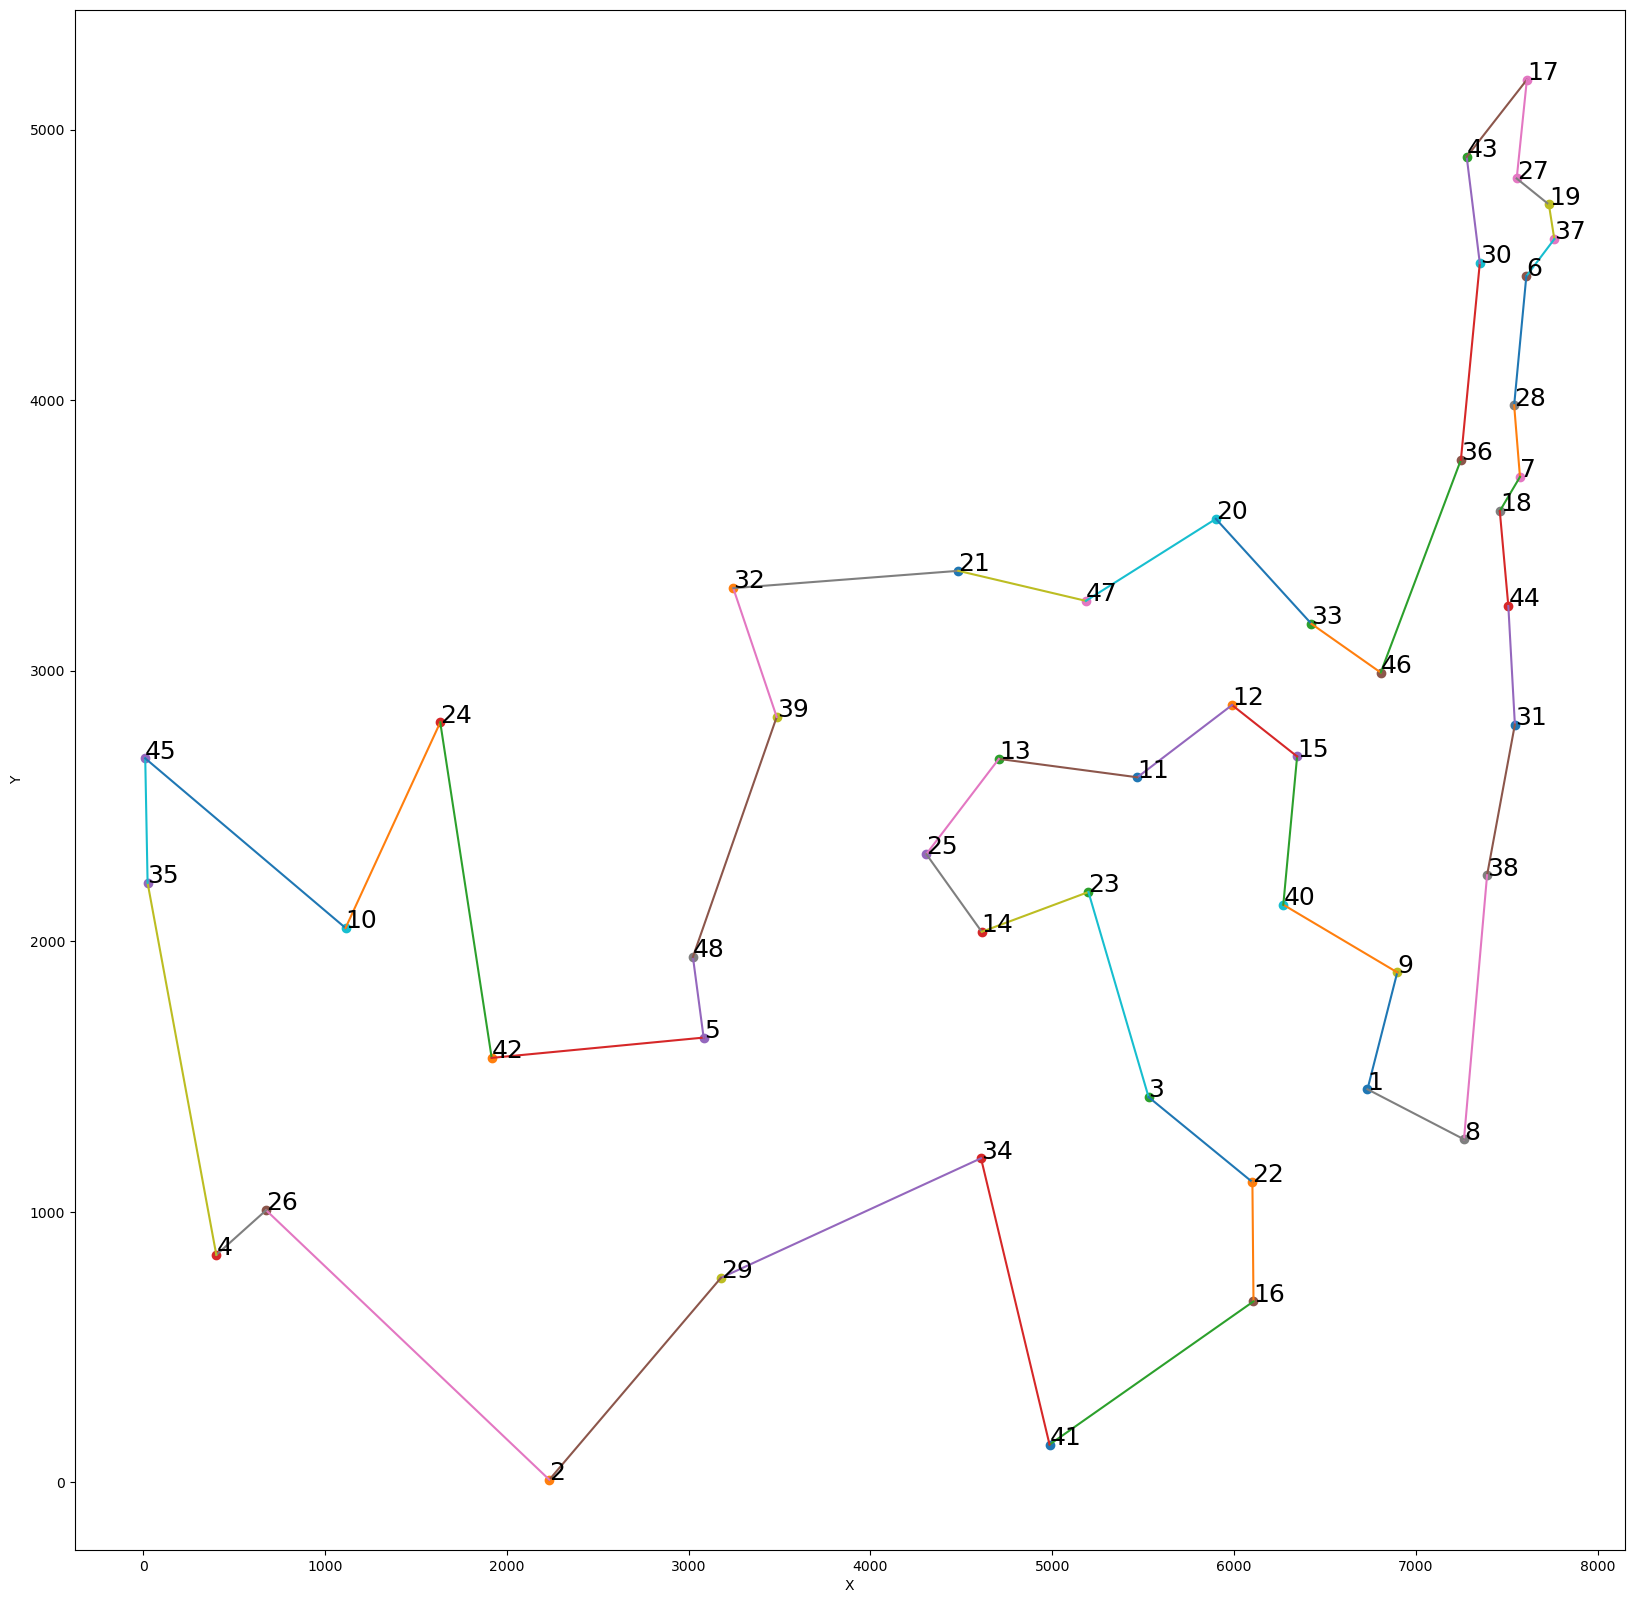

In [20]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
for i in Nodes:
    plt.scatter(Nodes[i][0],Nodes[i][1])
    plt.text(Nodes[i][0],Nodes[i][1], str(i),fontsize=18)
            

for i in range(NumNodes -1):
      plt.plot([Nodes[sortedPos[i]][0],Nodes[sortedPos[i+1]][0]],
               [Nodes[sortedPos[i]][1],Nodes[sortedPos[i+1]][1]])  
            
plt.plot([Nodes[sortedPos[len(sortedPos)-1]][0],Nodes[sortedPos[0]][0]],
         [Nodes[sortedPos[len(sortedPos)-1]][1],Nodes[sortedPos[0]][1]])
        
plt.xlabel('X');
plt.ylabel('Y');